# Using Python for Research Homework: Week 5, Case Study Part 1

The [movie dataset on which this case study is based](https://www.kaggle.com/tmdb/tmdb-movie-metadata) is a database of 5000 movies catalogued by [The Movie Database (TMDb)](https://www.themoviedb.org/?language=en). The information available about each movie is its budget, revenue, rating, actors and actresses, etc. In this case study, we will use this dataset to determine whether any information about a movie can predict the total revenue of a movie. We will also attempt to predict whether a movie's revenue will exceed its budget.

In Part 1, we will inspect, clean, and transform the data.

### Exercise 1

First, we will import several libraries. `scikit-learn` (**sklearn**) contains helpful statistical models, and we'll use the `matplotlib.pyplot` library for visualizations. Of course, we will use `numpy` and `pandas` for data manipulation throughout.

#### Instructions 

- Read and execute the given code.
- Call `df.head()` to take a look at the data.

In [73]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

df = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@movie_data.csv", index_col=0)

# Enter code here.
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ..."


### Exercise 2

In this exercise, we will define the regression and classification outcomes. Specifically, we will use the `revenue` column as the target for regression. For classification, we will construct an indicator of profitability for each movie.

#### Instructions 
- Create a new column in `df` called `profitable`, defined as 1 if the movie `revenue` is greater than the movie `budget`, and 0 otherwise.
- Next, define and store the outcomes we will use for regression and classification.
    - Define `regression_target` as the string `'revenue'`.
    - Define `classification_target` as the string `'profitable'`.

In [74]:
# Enter code here.
df["profitable"] = (df.revenue > df.budget).astype(int)
df["profitable"]

0       1
1       1
2       1
3       1
4       1
       ..
4798    1
4799    0
4800    0
4801    0
4802    0
Name: profitable, Length: 4803, dtype: int64

In [75]:
regression_target = "revenue"
classification_target = "profitable"

In [76]:
sum(df["profitable"])

2585

In [77]:
# Alternative
df.profitable.value_counts()

1    2585
0    2218
Name: profitable, dtype: int64

### Exercise 3

For simplicity, we will proceed by analyzing only the rows without any missing data. In this exercise, we will remove rows with any infinite or missing values.

#### Instructions 

- Use `df.replace()` to replace any cells with type `np.inf` or `-np.inf` with `np.nan`.
- Drop all rows with any `np.nan` values in that row using `df.dropna()`. Do any further arguments need to be specified in this function to remove rows with any such values?

In [78]:
# Enter code here.
df = df.replace(np.inf or -np.inf, np.nan) # df.replace([np.inf, -np.inf], np.nan)

In [79]:
df = df.dropna(axis = 0) # df = df.dropna(how="any")

df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,profitable
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",1
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",1
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",1
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An...",1
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758,4000000,"Thriller, Science Fiction",https://www.facebook.com/thesignalfilm,242095,"hacker, supernatural powers, road trip, indepe...",en,The Signal,Three college students on a road trip across t...,27.662696,"Automatik Entertainment, Low Spark Films, Sign...",United States of America,2014-03-15,600896,95.0,English,Released,R U Agitated?,The Signal,5.8,631,242095,"Brenton Thwaites, Olivia Cooke, Beau Knapp, La...",0
4766,0,"Documentary, Music",http://www.mgm.com/#/our-titles/1092/The-Last-...,13963,"1970s, music",en,The Last Waltz,Martin Scorsese's rockumentary intertwines foo...,3.277287,"FM Productions, Last Waltz Inc.",United States of America,1978-05-01,321952,117.0,English,Released,It Started as a Concert. It Became a Celebration.,The Last Waltz,7.9,64,13963,"Robbie Robertson, Rick Danko, Levon Helm, Rich...",1
4773,27000,Comedy,http://www.miramax.com/movie/clerks/,2292,"salesclerk, loser, aftercreditsstinger",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"Miramax Films, View Askew Productions",United States of America,1994-09-13,3151130,92.0,English,Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,2292,"Brian O'Halloran, Jeff Anderson, Jason Mewes, ...",1
4791,13,Horror,http://tincanmanthemovie.com/,157185,home invasion,

### Exercise 4

Many of the variables in our dataframe contain the names of genre, actors/actresses, and keywords. Let's add indicator columns for each genre.

#### Instructions 

- Determine all the genres in the genre column. Make sure to use the `strip()` function on each genre to remove trailing characters.
- Next, include each listed genre as a new column in the dataframe. Each element of these genre columns should be 1 if the movie belongs to that particular genre, and 0 otherwise. Keep in mind, a movie may belong to several genres at once.
- Call `df[genres].head()` to view your results.

In [80]:
# Enter code here.
imd = list(set([y for x in df['genres'] for y in x.split(',')]))

full = []

for item in imd:
  full.append(item.strip())

set(full)

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [81]:
len(set(full))

20

In [82]:
# Alternative Approach

genre_list = df.genres.apply(lambda x: x.split(","))
genre_list

0       [Action,  Adventure,  Fantasy,  Science Fiction]
1                         [Adventure,  Fantasy,  Action]
2                           [Action,  Adventure,  Crime]
3                    [Action,  Crime,  Drama,  Thriller]
4                 [Action,  Adventure,  Science Fiction]
                              ...                       
4758                        [Thriller,  Science Fiction]
4766                               [Documentary,  Music]
4773                                            [Comedy]
4791                                            [Horror]
4796                [Science Fiction,  Drama,  Thriller]
Name: genres, Length: 1406, dtype: object

In [83]:
genres = []

for row in genre_list:
  for genre in row:
    row = [genre.strip() for genre in row]
    if genre not in genres:
      genres.append(genre)

genres

['Action',
 ' Adventure',
 ' Fantasy',
 ' Science Fiction',
 'Adventure',
 ' Action',
 ' Crime',
 ' Drama',
 ' Thriller',
 'Fantasy',
 'Animation',
 ' Family',
 ' Western',
 'Science Fiction',
 ' Comedy',
 'Drama',
 ' Romance',
 'Family',
 ' Horror',
 ' Animation',
 'Comedy',
 ' Mystery',
 'Western',
 'Thriller',
 ' War',
 ' History',
 'Romance',
 ' Music',
 'History',
 'Crime',
 'War',
 'Documentary',
 'Mystery',
 'Horror',
 'Music',
 ' Documentary',
 ' TV Movie',
 'TV Movie',
 'Foreign']

In [84]:
for genre in genres:
  df[genre] = df["genres"].str.contains(genre).astype(int)

df[genres].head()

,Action,Adventure,Fantasy,Science Fiction,Adventure,Action,Crime,Drama,Thriller,Fantasy,Animation,Family,Western,Science Fiction,Comedy,Drama,Romance,Family,Horror,Animation,Comedy,Mystery,Western,Thriller,War,History,Romance,Music,History,Crime,War,Documentary,Mystery,Horror,Music,Documentary,TV Movie,TV Movie,Foreign
0,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,profitable,Action,Adventure,Fantasy,Science Fiction,Adventure,Action,Crime,Drama,Thriller,Fantasy,Animation,Family,Western,Science Fiction,Comedy,Drama,Romance,Family,Horror,Animation,Comedy,Mystery,Western,Thriller,War,History,Romance,Music,History,Crime,War,Documentary,Mystery,Horror,Music,Documentary,TV Movie,TV Movie,Foreign
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",1,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An...",1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Exercise 5

Some variables in the dataset are already numeric and perhaps useful for regression and classification. In this exercise, we will store the names of these variables for future use. We will also take a look at some of the continuous variables and outcomes by plotting each pair in a scatter plot. Finally, we will evaluate the skew of each variable.

#### Instructions 
- Call `plt.show()` to observe the plot below.
    - Which of the covariates and/or outcomes are correlated with each other?
- Call `skew()` on the columns `outcomes_and_continuous_covariates` in df.
    - Is the skew above 1 for any of these variables?

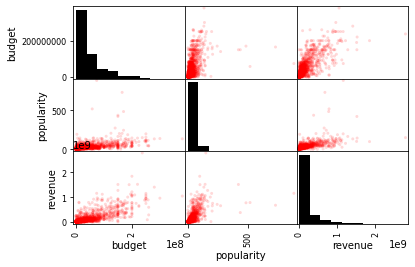

In [86]:
continuous_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_covariates = continuous_covariates + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

axes = pd.plotting.scatter_matrix(df[plotting_variables], 
                                  alpha=0.15,color=(0,0,0), 
                                  hist_kwds={"color":(0,0,0)}, 
                                  facecolor=(1,0,0))
# show the plot.
plt.show()

In [87]:
# determine the skew.
df[outcomes_and_continuous_covariates]

,budget,popularity,runtime,vote_count,vote_average,revenue,profitable
0,237000000,150.437577,162.0,11800,7.2,2787965087,1
1,300000000,139.082615,169.0,4500,6.9,961000000,1
2,245000000,107.376788,148.0,4466,6.3,880674609,1
3,250000000,112.312950,165.0,9106,7.6,1084939099,1
4,260000000,43.926995,132.0,2124,6.1,284139100,1
...,...,...,...,...,...,...,...
4758,4000000,27.662696,95.0,631,5.8,600896,0
4766,0,3.277287,117.0,64,7.9,321952,1
4773,27000,19.748658,92.0,755,7.4,3151130,1
4791,13,0.332679,84.0,1,2.0,0,0


In [88]:
df[outcomes_and_continuous_covariates].skew()

budget          1.754872
popularity      7.968139
runtime         1.059804
vote_count      2.461041
vote_average   -1.080038
revenue         3.084680
profitable     -1.081030
dtype: float64

### Exercise 6

It appears that the variables `budget`, `popularity`, `runtime`, `vote_count`, and `revenue` are all right-skewed. In this exercise, we will transform these variables to eliminate this skewness. Specifically, we will use the `np.log10()` method. Because some of these variable values are exactly 0, we will add a small positive value to each to ensure it is defined; this is necessary because log(0) is negative infinity.

#### Instructions 
- For each above-mentioned variable in `df`, transform value `x` into `np.log10(1+x)`.

In [89]:
# Enter your code here.
right_skew = df[outcomes_and_continuous_covariates].skew()[df[outcomes_and_continuous_covariates].skew() > 1]
index_list = list(right_skew.index)
index_list

['budget', 'popularity', 'runtime', 'vote_count', 'revenue']

In [90]:
df[index_list].head(2)

,budget,popularity,runtime,vote_count,revenue
0,237000000,150.437577,162.0,11800,2787965087
1,300000000,139.082615,169.0,4500,961000000


In [91]:
df[index_list] = df[index_list].apply(lambda x: np.log10(1+x))
df[index_list].head()

,budget,popularity,runtime,vote_count,revenue
0,8.374748,2.180234,2.212188,4.071919,9.445287
1,8.477121,2.146384,2.230449,3.653309,8.982723
2,8.389166,2.034936,2.173186,3.650016,8.944815
3,8.397940,2.054280,2.220108,3.959375,9.035405
4,8.414973,1.652507,2.123852,3.327359,8.453531


What is the new value of skew() for the covariate runtime? Please provide the answer to 3 decimal points.

In [92]:
df["runtime"].skew()

0.5304890161265846

### Exercise 7

Let's now save our dataset. 

#### Instructions 
- Use `to_csv()` to save the `df` object as `movies_clean.csv`.

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [96]:
cd "/content/drive/MyDrive/Edx: Using Python for Research"

/content/drive/MyDrive/Edx: Using Python for Research


In [97]:
# Enter your code here
df.to_csv("movies_clean.csv")